### Loading and Viewing the Dataset

In [293]:
# import libraries
import pandas as pd
import numpy as np

# load the datasets
retail_data = pd.read_csv('retail_data_W23 - retail_data_W23.csv')
retail_orders = pd.read_csv('retail_orders_W23 - retail_orders_W23.csv')
store_data = pd.read_csv('store - store.csv')

In [294]:
# store dataframes in a dictionary
dataframes = {'retail_data': retail_data, 'retail_orders': retail_orders, 'store_data': store_data}

# view first 5 rows and info
for name, df in dataframes.items():
    print(f"\n{name} DataFrame - First 5 Rows:")
    print(df.head()) 
    
    print(f"\n{name} DataFrame - Info:")
    print(df.info())


retail_data DataFrame - First 5 Rows:
   Store  DayOfWeek        Date  Customers  Open  Promo StateHoliday  \
0      3          5  2015-07-31        821     1      1            0   
1      4          5  2015-07-31       1498     1      1            0   
2      5          5  2015-07-31        559     1      1            0   
3      6          5  2015-07-31        589     1      1            0   
4     10          5  2015-07-31        681     1      1            0   

   SchoolHoliday   Id  
0              1  409  
1              1  427  
2              1  445  
3              1  463  
4              1  535  

retail_data DataFrame - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651013 entries, 0 to 651012
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          651013 non-null  int64 
 1   DayOfWeek      651013 non-null  int64 
 2   Date           651013 non-null  object
 3   Customers      651

### Exploratory Data Analysis

In [295]:
# Disable scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)

# view statistical summary
for name, df in dataframes.items():
    print(f"\n{name} DataFrame - Describe:")
    print(df.describe())


retail_data DataFrame - Describe:
       Store  DayOfWeek  Customers   Open  Promo  SchoolHoliday       Id
count 651013     651013     651013 651013 651013         651013   651013
mean     559          4        633      1      0              0  9153619
std      322          2        465      0      0              0  5285944
min        1          1          0      0      0              0      409
25%      281          2        404      1      0              0  4578709
50%      558          4        609      1      0              0  9151915
75%      838          6        837      1      1              0 13733527
max     1115          7       5458      1      1              1 18310099

retail_orders DataFrame - Describe:
            Id  Orders
count   651013  651013
mean   9153619    5771
std    5285944    3851
min        409       0
25%    4578709    3721
50%    9151915    5743
75%   13733527    7856
max   18310099   38722

store_data DataFrame - Describe:
       Store  CompetitionDista

In [296]:
# check for missing values
for name, df in dataframes.items():
    print(f"Missing values in {name}:")
    print(df.isna().sum())
    print()

Missing values in retail_data:
Store            0
DayOfWeek        0
Date             0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Id               0
dtype: int64

Missing values in retail_orders:
Id        0
Orders    0
dtype: int64

Missing values in store_data:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64



In [299]:
# Filter rows where CompetitionDistance is missing
missing_competition_distance = cleaned_store_data.loc[store_data['CompetitionDistance'].isna()]

# Display those rows with all columns
print(missing_competition_distance)

     Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                    0   
621    622         a          c                    0   
878    879         d          a                    0   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                          8                      2010       0   
621                          8                      2010       0   
878                          8                      2010       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290               22             2012          Missing  
621               22             2012          Missing  
878                5             2013  Feb,May,Aug,Nov  


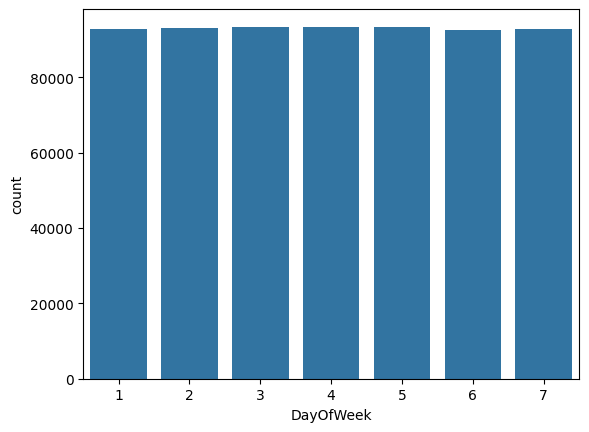

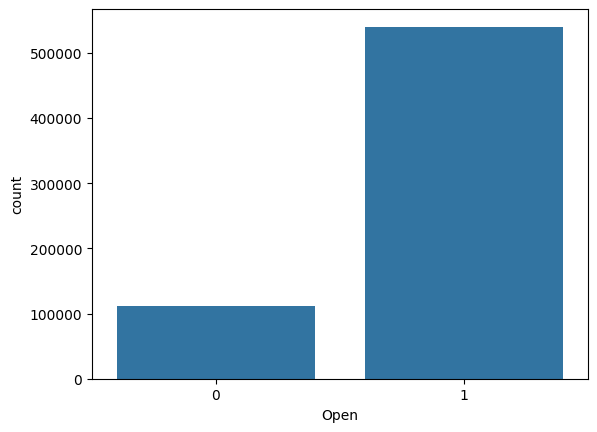

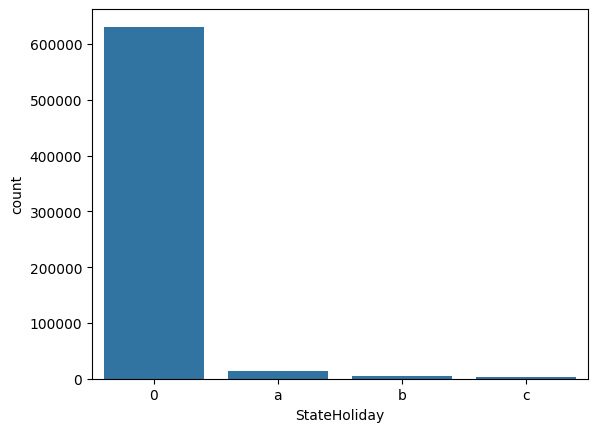

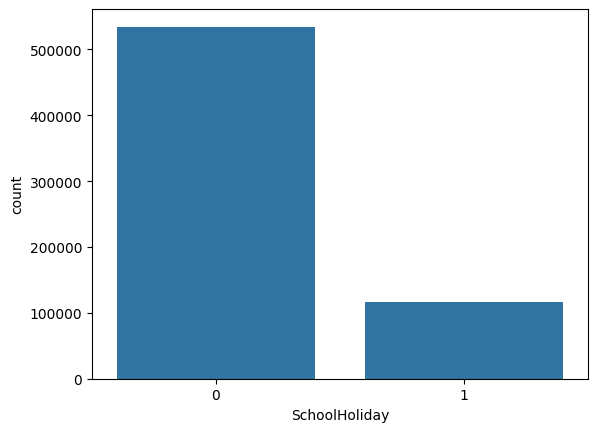

In [317]:
# Check unique values in categorical columns of retail_data
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='DayOfWeek', data=retail_data)
plt.show()

sns.countplot(x='Open', data=retail_data)
plt.show()

sns.countplot(x='StateHoliday', data=retail_data)
plt.show()

sns.countplot(x='SchoolHoliday', data=retail_data)
plt.show()

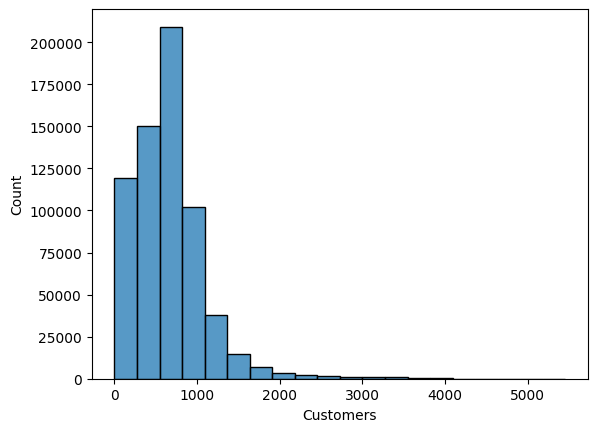

In [318]:
# Histogram for Customers
sns.histplot(retail_data['Customers'], bins=20)
plt.show()

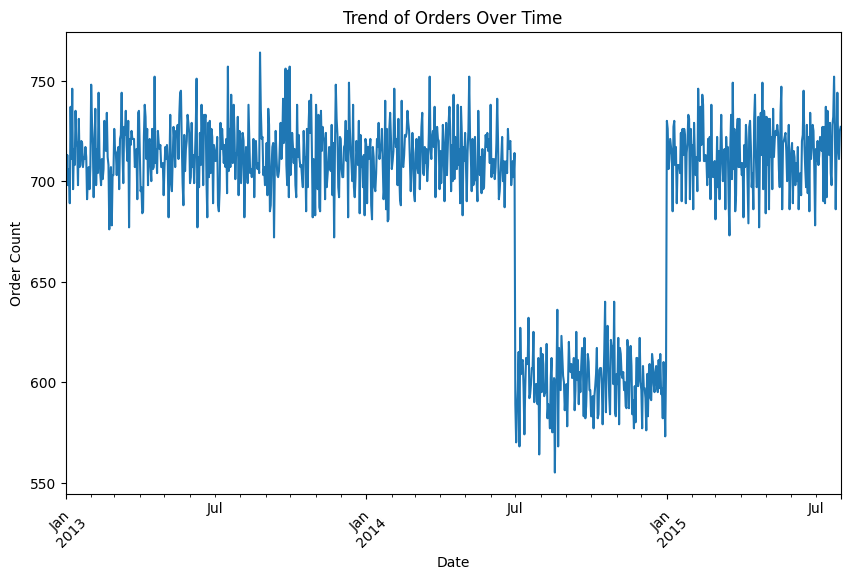

In [319]:
# Convert Date to datetime format if not done already
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

# Count the number of entries per date
date_counts = retail_data['Date'].value_counts().sort_index()

# Line plot to visualize the trend over time
plt.figure(figsize=(10, 6))
date_counts.plot(kind='line')
plt.title('Trend of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()

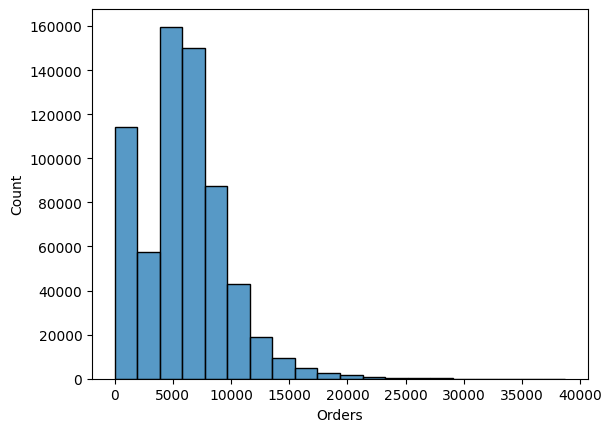

In [335]:
# Visualize retail_orders dataset
# Histogram for Orders
sns.histplot(retail_orders['Orders'], bins=20)
plt.show()

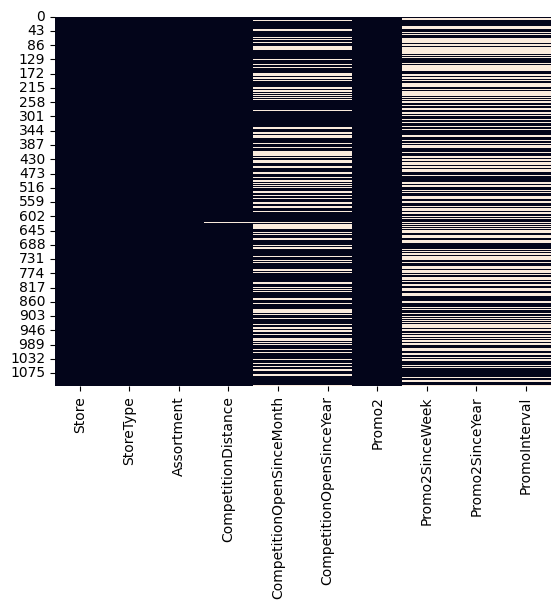

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data in store_data
sns.heatmap(store_data.isna(), cbar=False)
plt.show()

In [337]:
# Descriptive stats for the columns
print(store_data[['CompetitionDistance','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']].describe())

       CompetitionDistance  CompetitionOpenSinceMonth  \
count                 1112                        761   
mean                  5405                          7   
std                   7663                          3   
min                     20                          1   
25%                    718                          4   
50%                   2325                          8   
75%                   6882                         10   
max                  75860                         12   

       CompetitionOpenSinceYear  Promo2SinceWeek  Promo2SinceYear  
count                       761              571              571  
mean                       2009               24             2012  
std                           6               14                2  
min                        1900                1             2009  
25%                        2006               13             2011  
50%                        2010               22             2012  
75%       

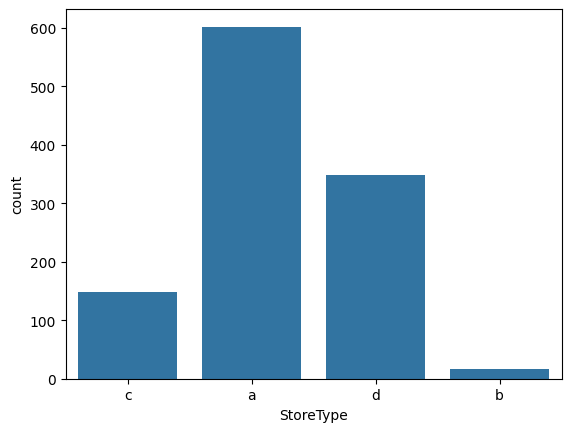

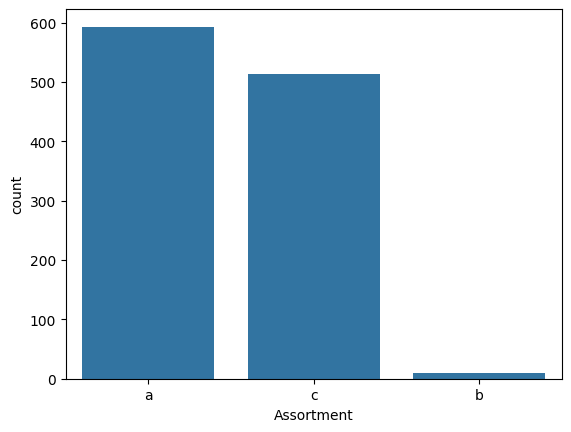

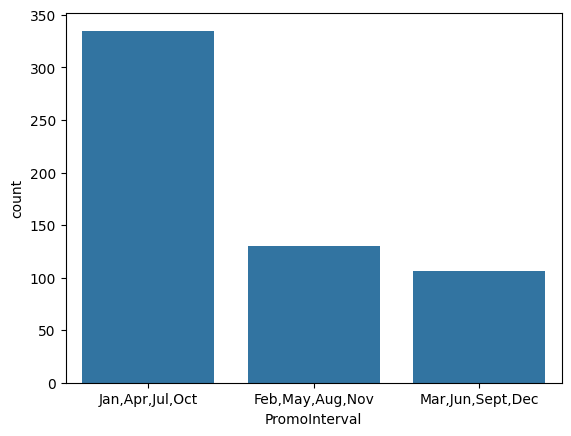

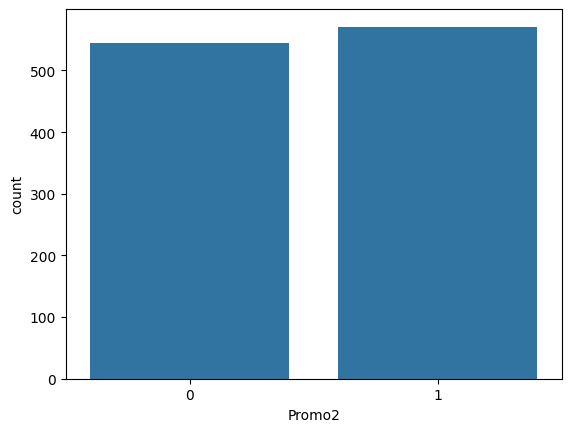

In [338]:
# Check unique values in categorical columns of store_data
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='StoreType', data=store_data)
plt.show()

sns.countplot(x='Assortment', data=store_data)
plt.show()

sns.countplot(x='PromoInterval', data=store_data)
plt.show()

sns.countplot(x='Promo2', data=store_data)
plt.show()

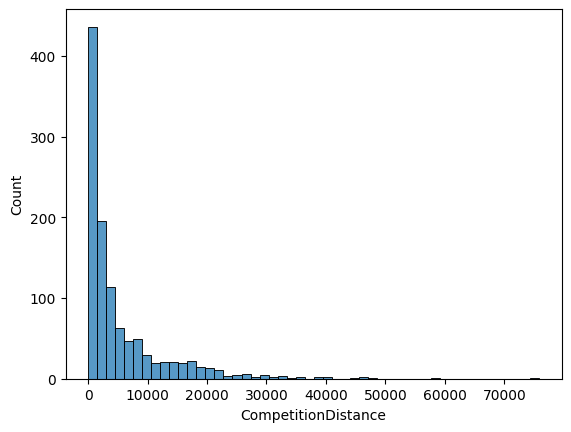

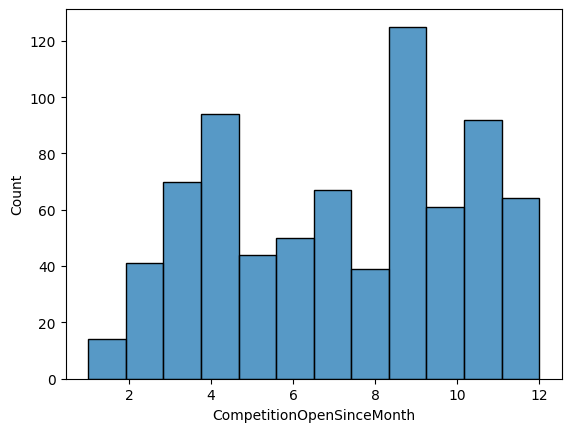

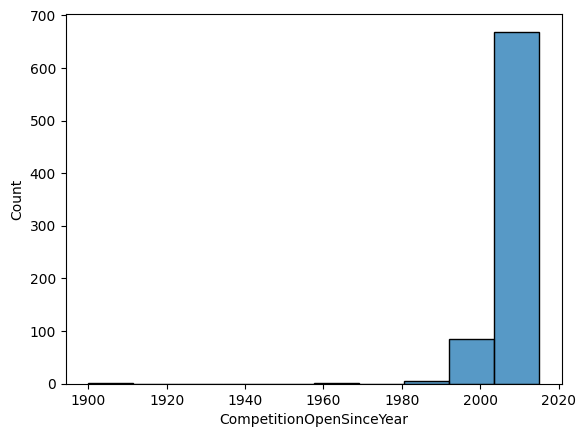

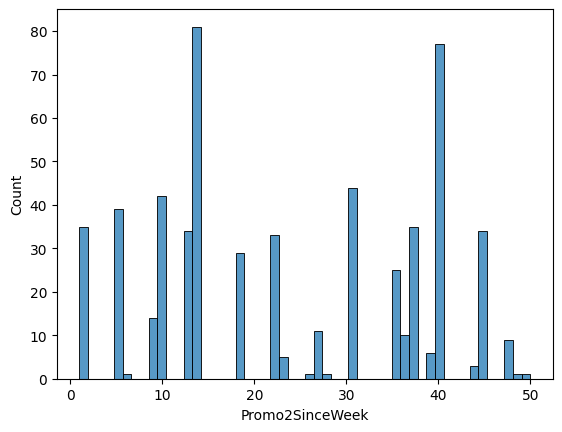

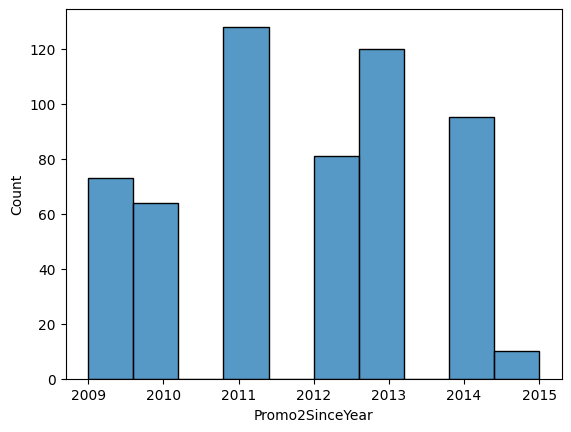

In [342]:
# Histograms for the columns of store_data
sns.histplot(store_data['CompetitionDistance'], bins=50)
plt.show()

sns.histplot(store_data['CompetitionOpenSinceMonth'], bins=12)
plt.show()

sns.histplot(store_data['CompetitionOpenSinceYear'], bins=10)
plt.show()

sns.histplot(store_data['Promo2SinceWeek'], bins=52)
plt.show()

sns.histplot(store_data['Promo2SinceYear'], bins=10)
plt.show()

### Handling Missing Values

In [429]:
# Create a copy of the original store_data for cleaning
cleaned_store_data = store_data.copy()

# Fill NaN values with 'Missing' in the 'PromoInterval' column
cleaned_store_data['PromoInterval'] = cleaned_store_data['PromoInterval'].fillna('Missing')

# Fill missing values of 'CompetitionDistance' with median values
cleaned_store_data['CompetitionDistance'] = cleaned_store_data['CompetitionDistance'].fillna(cleaned_store_data['CompetitionDistance'].median())

# Fill missing values of 'CompetitionOpenSinceMonth' with the median of that column
cleaned_store_data['CompetitionOpenSinceMonth'] = cleaned_store_data['CompetitionOpenSinceMonth'].fillna(cleaned_store_data['CompetitionOpenSinceMonth'].median())

# Fill missing values of 'CompetitionOpenSinceYear' with the median of that column
cleaned_store_data['CompetitionOpenSinceYear'] = cleaned_store_data['CompetitionOpenSinceYear'].fillna(cleaned_store_data['CompetitionOpenSinceYear'].median())

# Fill missing values of 'Promo2SinceWeek' with the median of that column
cleaned_store_data['Promo2SinceWeek'] = cleaned_store_data['Promo2SinceWeek'].fillna(cleaned_store_data['Promo2SinceWeek'].median())

# Fill missing values of 'Promo2SinceYear' with the median of that column
cleaned_store_data['Promo2SinceYear'] = cleaned_store_data['Promo2SinceYear'].fillna(cleaned_store_data['Promo2SinceYear'].median())

# To verify changes, you can inspect the first few rows
print(cleaned_store_data.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a                 1270                          9   
1      2         a          a                  570                         11   
2      3         a          a                14130                         12   
3      4         c          c                  620                          9   
4      5         a          a                29910                          4   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0               22             2012   
1                      2007       1               13             2010   
2                      2006       1               14             2011   
3                      2009       0               22             2012   
4                      2015       0               22             2012   

     PromoInterval  
0          Missing  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [430]:
# verify if no missing value
print(cleaned_store_data.isna().sum())
print()

# verify the statistical summary
print(cleaned_store_data.describe())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

       Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count   1115                 1115                       1115   
mean     558                 5397                          7   
std      322                 7655                          3   
min        1                   20                          1   
25%      280                  720                          6   
50%      558                 2325                          8   
75%      836                 6875                          9   
max     1115                75860                         12   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  
count                  

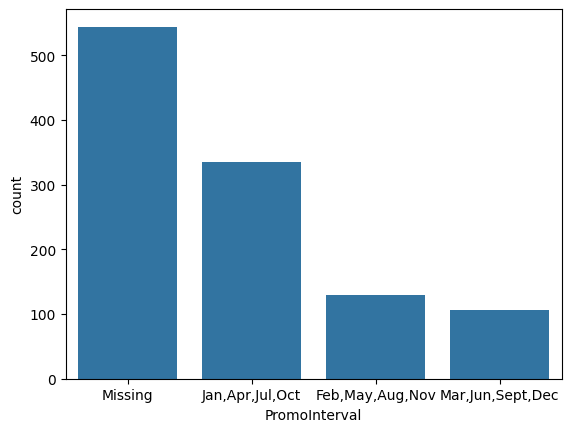

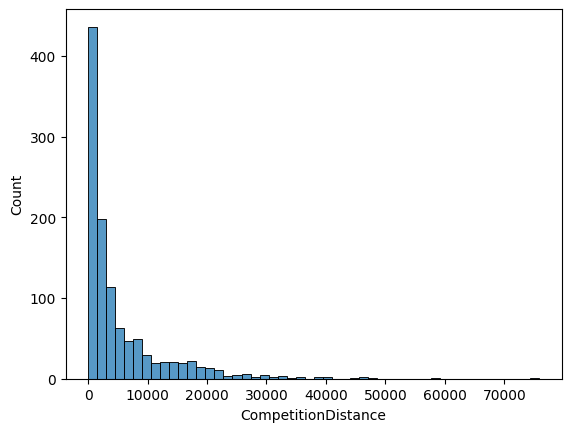

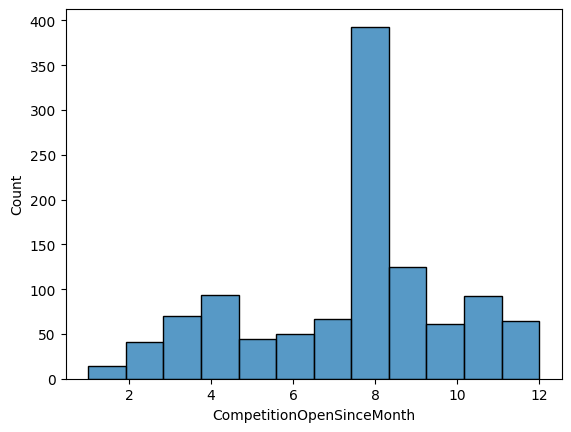

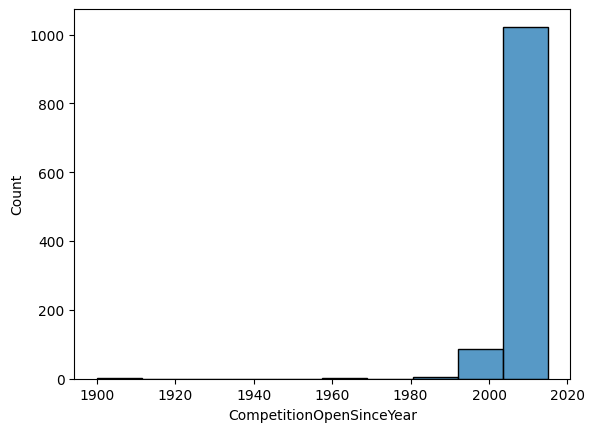

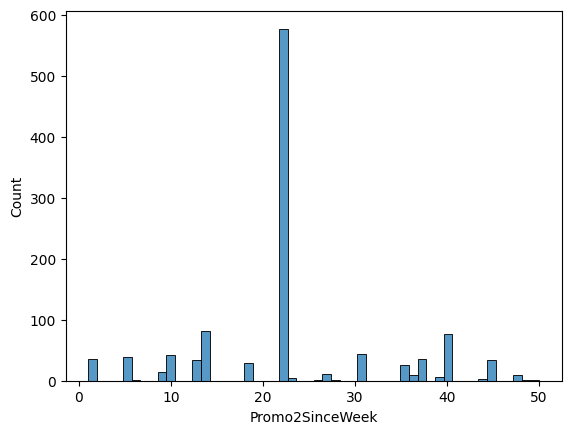

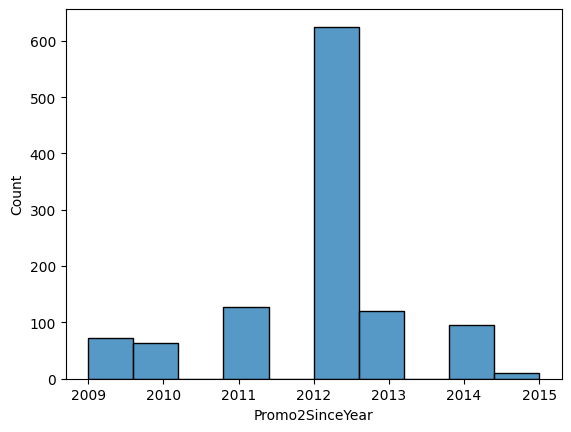

In [431]:
# re-visualize the updated columns
sns.countplot(x='PromoInterval', data=cleaned_store_data)
plt.show()

sns.histplot(cleaned_store_data['CompetitionDistance'], bins=50)
plt.show()

sns.histplot(cleaned_store_data['CompetitionOpenSinceMonth'], bins=12)
plt.show()

sns.histplot(cleaned_store_data['CompetitionOpenSinceYear'], bins=10)
plt.show()

sns.histplot(cleaned_store_data['Promo2SinceWeek'], bins=52)
plt.show()

sns.histplot(cleaned_store_data['Promo2SinceYear'], bins=10)
plt.show()

### Encoding Categorical Variables

In [447]:
# Apply one-hot encoding for categorical columns in retail_data
retail_data_cat_cols = ['DayOfWeek', 'StateHoliday']
retail_data_encoded = pd.get_dummies(retail_data, columns=retail_data_cat_cols)

print(f"Original retail_data shape: {retail_data.shape}")
print(f"Shape of retail_data_encoded: {retail_data_encoded.shape}")
print(retail_data_encoded.columns)
# print(retail_data_encoded.isnull().sum())
print()

# Apply one-hot encoding for categorical columns in store_data
store_cat_cols = ['StoreType', 'Assortment', 'PromoInterval']
store_data_encoded = pd.get_dummies(cleaned_store_data, columns=store_cat_cols)

print(f"Original retail_data shape: {store_data.shape}")
print(f"Shape of store_data_encoded: {store_data_encoded.shape}")
# print(store_data_encoded.isnull().sum())
print(store_data_encoded.columns)

Original retail_data shape: (651013, 9)
Shape of retail_data_encoded: (651013, 18)
Index(['Store', 'Date', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'Id',
       'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

Original retail_data shape: (1115, 10)
Shape of store_data_encoded: (1115, 18)
Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_Missing'],
      dtype='object')


### Scaling/Normalizing Numerical Variables

In [433]:
# from sklearn.preprocessing import MinMaxScaler

# # Create a MinMaxScaler instance
# scaler = MinMaxScaler()

# # Scale the CompetitionDistance column
# store_data_encoded['CompetitionDistance'] = scaler.fit_transform(store_data_encoded[['CompetitionDistance']])

# # Visualized the scaled values
# sns.histplot(store_data_encoded['CompetitionDistance'], bins=50)
# plt.show()

# print(store_data_encoded.describe())

### Merging the DataFrames

In [448]:
# Merge retail_data and store_data
merged_data = pd.merge(retail_data_encoded, store_data_encoded, on='Store', how='inner')

# Then, merge retail_orders
merged_data = pd.merge(merged_data, retail_orders, on='Id', how='inner')

print(merged_data.head())
print(merged_data.describe())

   Store       Date  Customers  Open  Promo  SchoolHoliday   Id  DayOfWeek_1  \
0      3 2015-07-31        821     1      1              1  409        False   
1      4 2015-07-31       1498     1      1              1  427        False   
2      5 2015-07-31        559     1      1              1  445        False   
3      6 2015-07-31        589     1      1              1  463        False   
4     10 2015-07-31        681     1      1              1  535        False   

   DayOfWeek_2  DayOfWeek_3  ...  StoreType_c  StoreType_d  Assortment_a  \
0        False        False  ...        False        False          True   
1        False        False  ...         True        False         False   
2        False        False  ...        False        False          True   
3        False        False  ...        False        False          True   
4        False        False  ...        False        False          True   

   Assortment_b  Assortment_c  PromoInterval_Feb,May,Aug,Nov  

In [449]:
print(merged_data.isna().sum())

Store                             0
Date                              0
Customers                         0
Open                              0
Promo                             0
SchoolHoliday                     0
Id                                0
DayOfWeek_1                       0
DayOfWeek_2                       0
DayOfWeek_3                       0
DayOfWeek_4                       0
DayOfWeek_5                       0
DayOfWeek_6                       0
DayOfWeek_7                       0
StateHoliday_0                    0
StateHoliday_a                    0
StateHoliday_b                    0
StateHoliday_c                    0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
StoreType_a                       0
StoreType_b                       0
StoreType_c                       0
StoreType_d                 

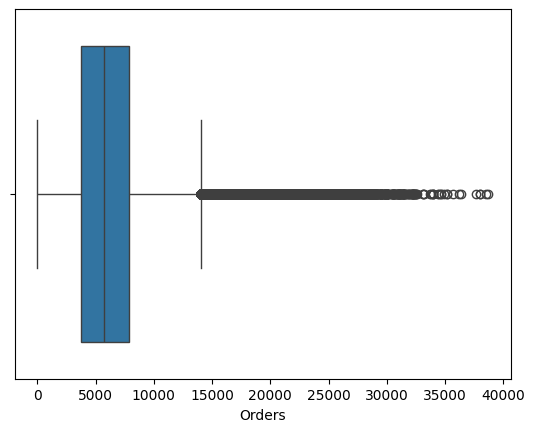

In [436]:
sns.boxplot(x=merged_data['Orders'])
plt.show()

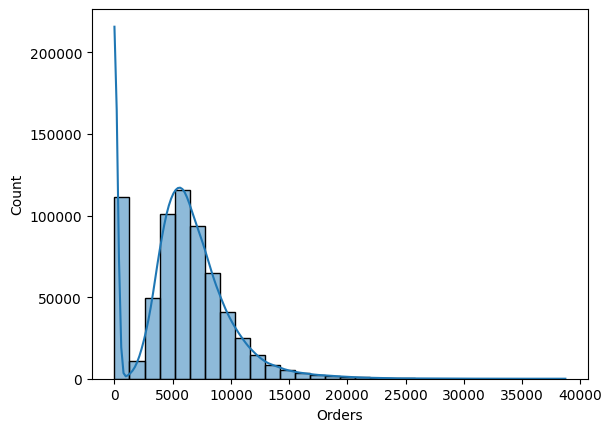

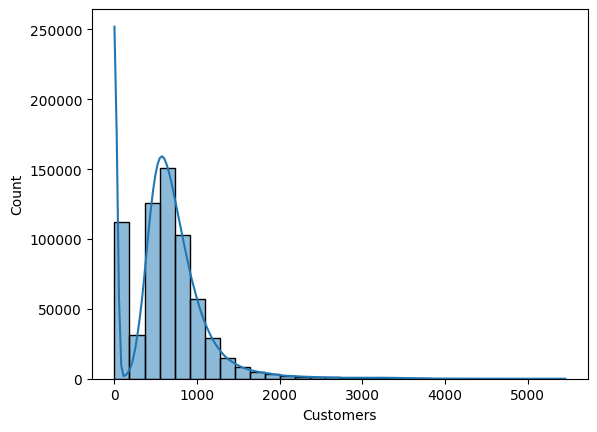

In [437]:
sns.histplot(merged_data['Orders'], bins=30, kde=True)
plt.show()

sns.histplot(merged_data['Customers'], bins=30, kde=True)
plt.show()

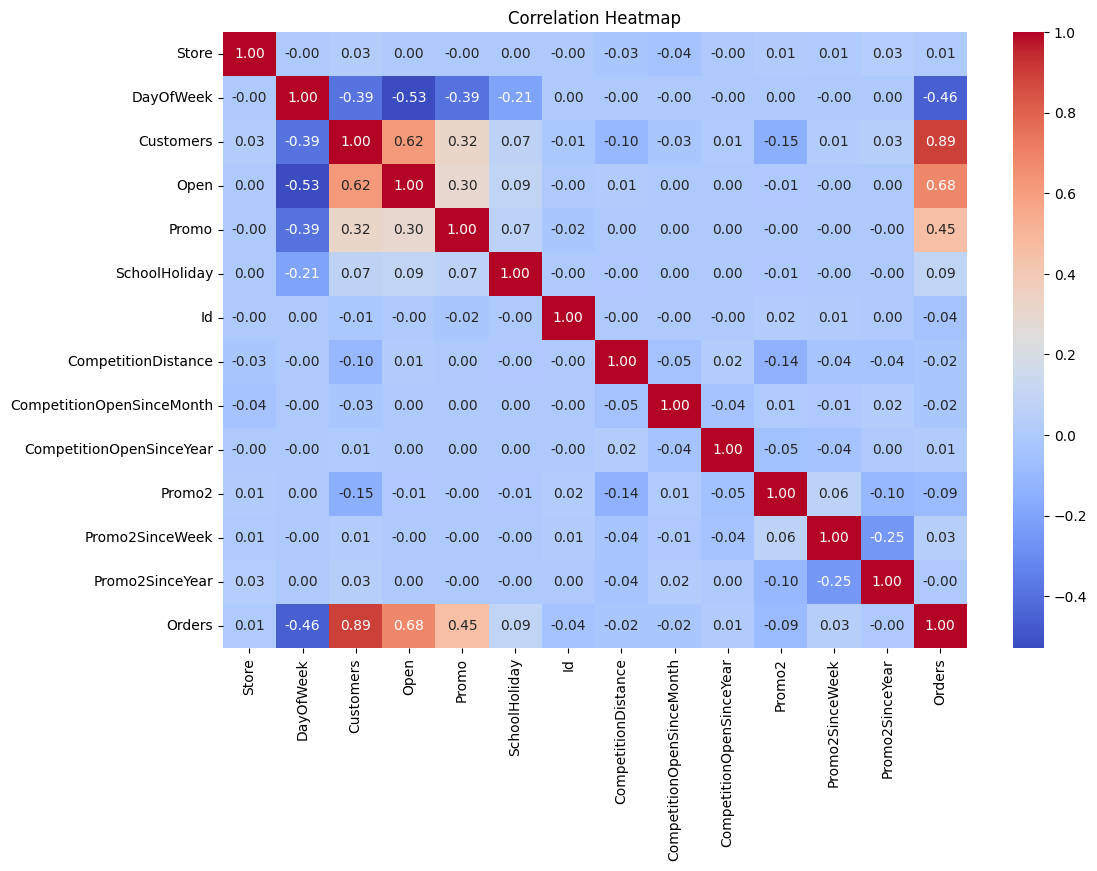

In [438]:
# Select only numeric columns for correlation matrix
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Compute and plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Feature Engineering

In [439]:
merged_data['Year'] = merged_data['Date'].dt.year
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Day'] = merged_data['Date'].dt.day
merged_data['WeekOfYear'] = merged_data['Date'].dt.isocalendar().week

In [440]:
merged_data['Promo_SchoolHoliday'] = merged_data['Promo'] * merged_data['SchoolHoliday']

merged_data['Promo_StateHoliday_0'] = merged_data['Promo'] * merged_data['StateHoliday_0']
merged_data['Promo_StateHoliday_a'] = merged_data['Promo'] * merged_data['StateHoliday_a']
merged_data['Promo_StateHoliday_b'] = merged_data['Promo'] * merged_data['StateHoliday_b']
merged_data['Promo_StateHoliday_c'] = merged_data['Promo'] * merged_data['StateHoliday_c']

In [441]:
last_recorded_year = 2015
merged_data['Promo2Duration'] = merged_data['Promo2SinceYear']. \
                                apply(lambda x: last_recorded_year - x if x > 0 else 0)

In [442]:
merged_data['Promo2Active'] = (merged_data['Promo2'] == 1) & \
                                (merged_data['Month'].isin([2, 5, 8, 11]))

In [443]:
last_recorded_year = 2015
merged_data['CompetitionOpenDuration'] = last_recorded_year - merged_data['CompetitionOpenSinceYear'] 

In [446]:
merged_data['CompetitionDistance_Category'] = pd.cut(merged_data['CompetitionDistance'], \
                                                     bins=[0, 1000, 5000, 10000, 20000, float('inf')], \
                                                     labels=['Very Close', 'Close', 'Moderate', 'Far', 'Very Far'])